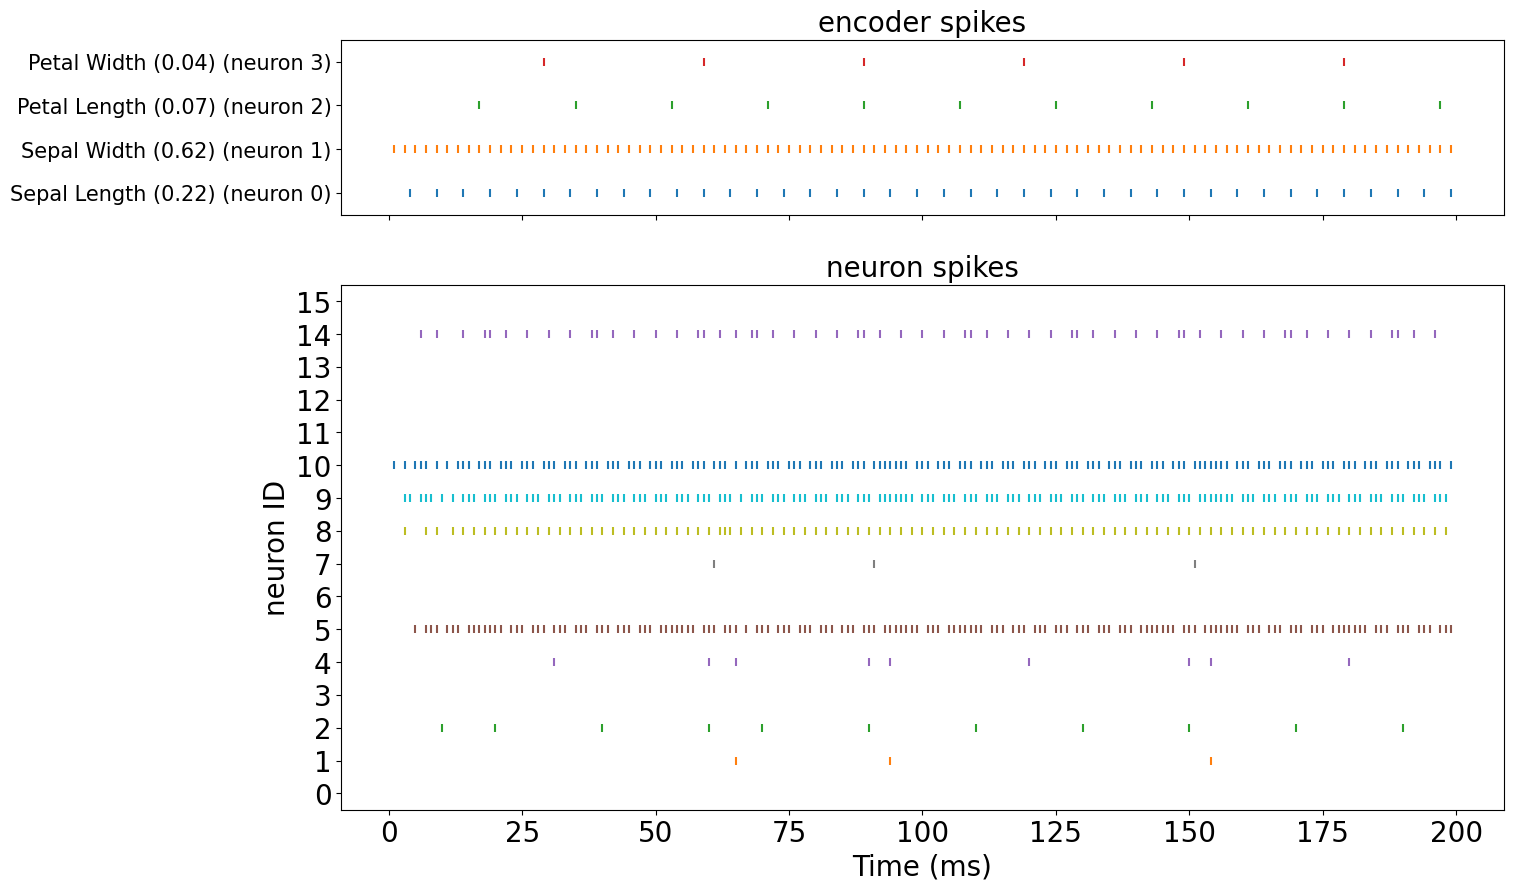

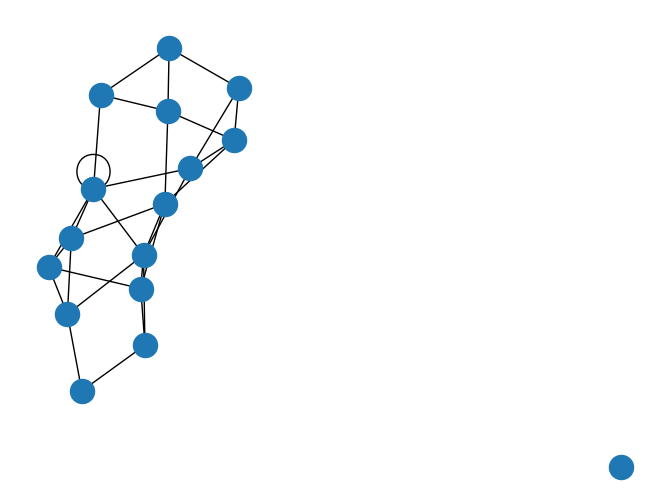

In [8]:
import matplotlib.pyplot as plt
import numpy as np

from snn_dpe.tools.data import normalize_iris_data, read_iris_data
from snn_dpe.tools.network import (create_encoders, create_network,
                                   reset_network, run_network)
from snn_dpe.tools.plotting import plot_network, plot_spikes

# load iris data
iris_data_location = '../../Datasets/Iris/iris.data'

iris_data, labels, classes, attributes = read_iris_data(iris_data_location, shuffle=False)

normalized_iris_data = normalize_iris_data(iris_data, attributes)

# create a test network and encoders
n_neurons = 16
n_synapses = 32

neurons = create_network(n_neurons, n_synapses)

min_f = 0
max_f = 800
sim_f = 1000

sim_time = 200

encoders = create_encoders(len(attributes), min_f, max_f, sim_f)

enc_inputs = normalized_iris_data[0]

# feed a test sample into the test network
neuron_fires, encoder_fires = run_network(neurons, encoders, enc_inputs, sim_time)

reset_network(neurons, encoders)

plot_spikes(neuron_fires, encoder_fires, attributes, enc_inputs)

plot_network(neurons)